# Train test split to detect overfitting

## Load data

In [2]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)
df

,Gender,Age,Married,YearsEmployed,Income,Approved
0,1,30,1,1.25,0,1
1,0,58,1,3.04,560,1
2,0,24,1,1.50,824,1
3,1,27,1,3.75,3,1
4,1,20,1,1.71,0,1
...,...,...,...,...,...,...
685,1,21,0,1.25,0,0
686,0,22,1,2.00,394,0
687,0,25,0,2.00,1,0
688,1,17,1,0.04,750,0


## Feature selection

In [3]:
target = 'Approved'

y = df[target]
X = df.drop(columns=target)

## Modelling will full data

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [5]:
model.score(X, y)

0.9927536231884058

## Modelling with split data

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
model.score(X_test, y_test)

0.6280193236714976

In [12]:
model.score(X_train, y_train)

0.9958592132505176

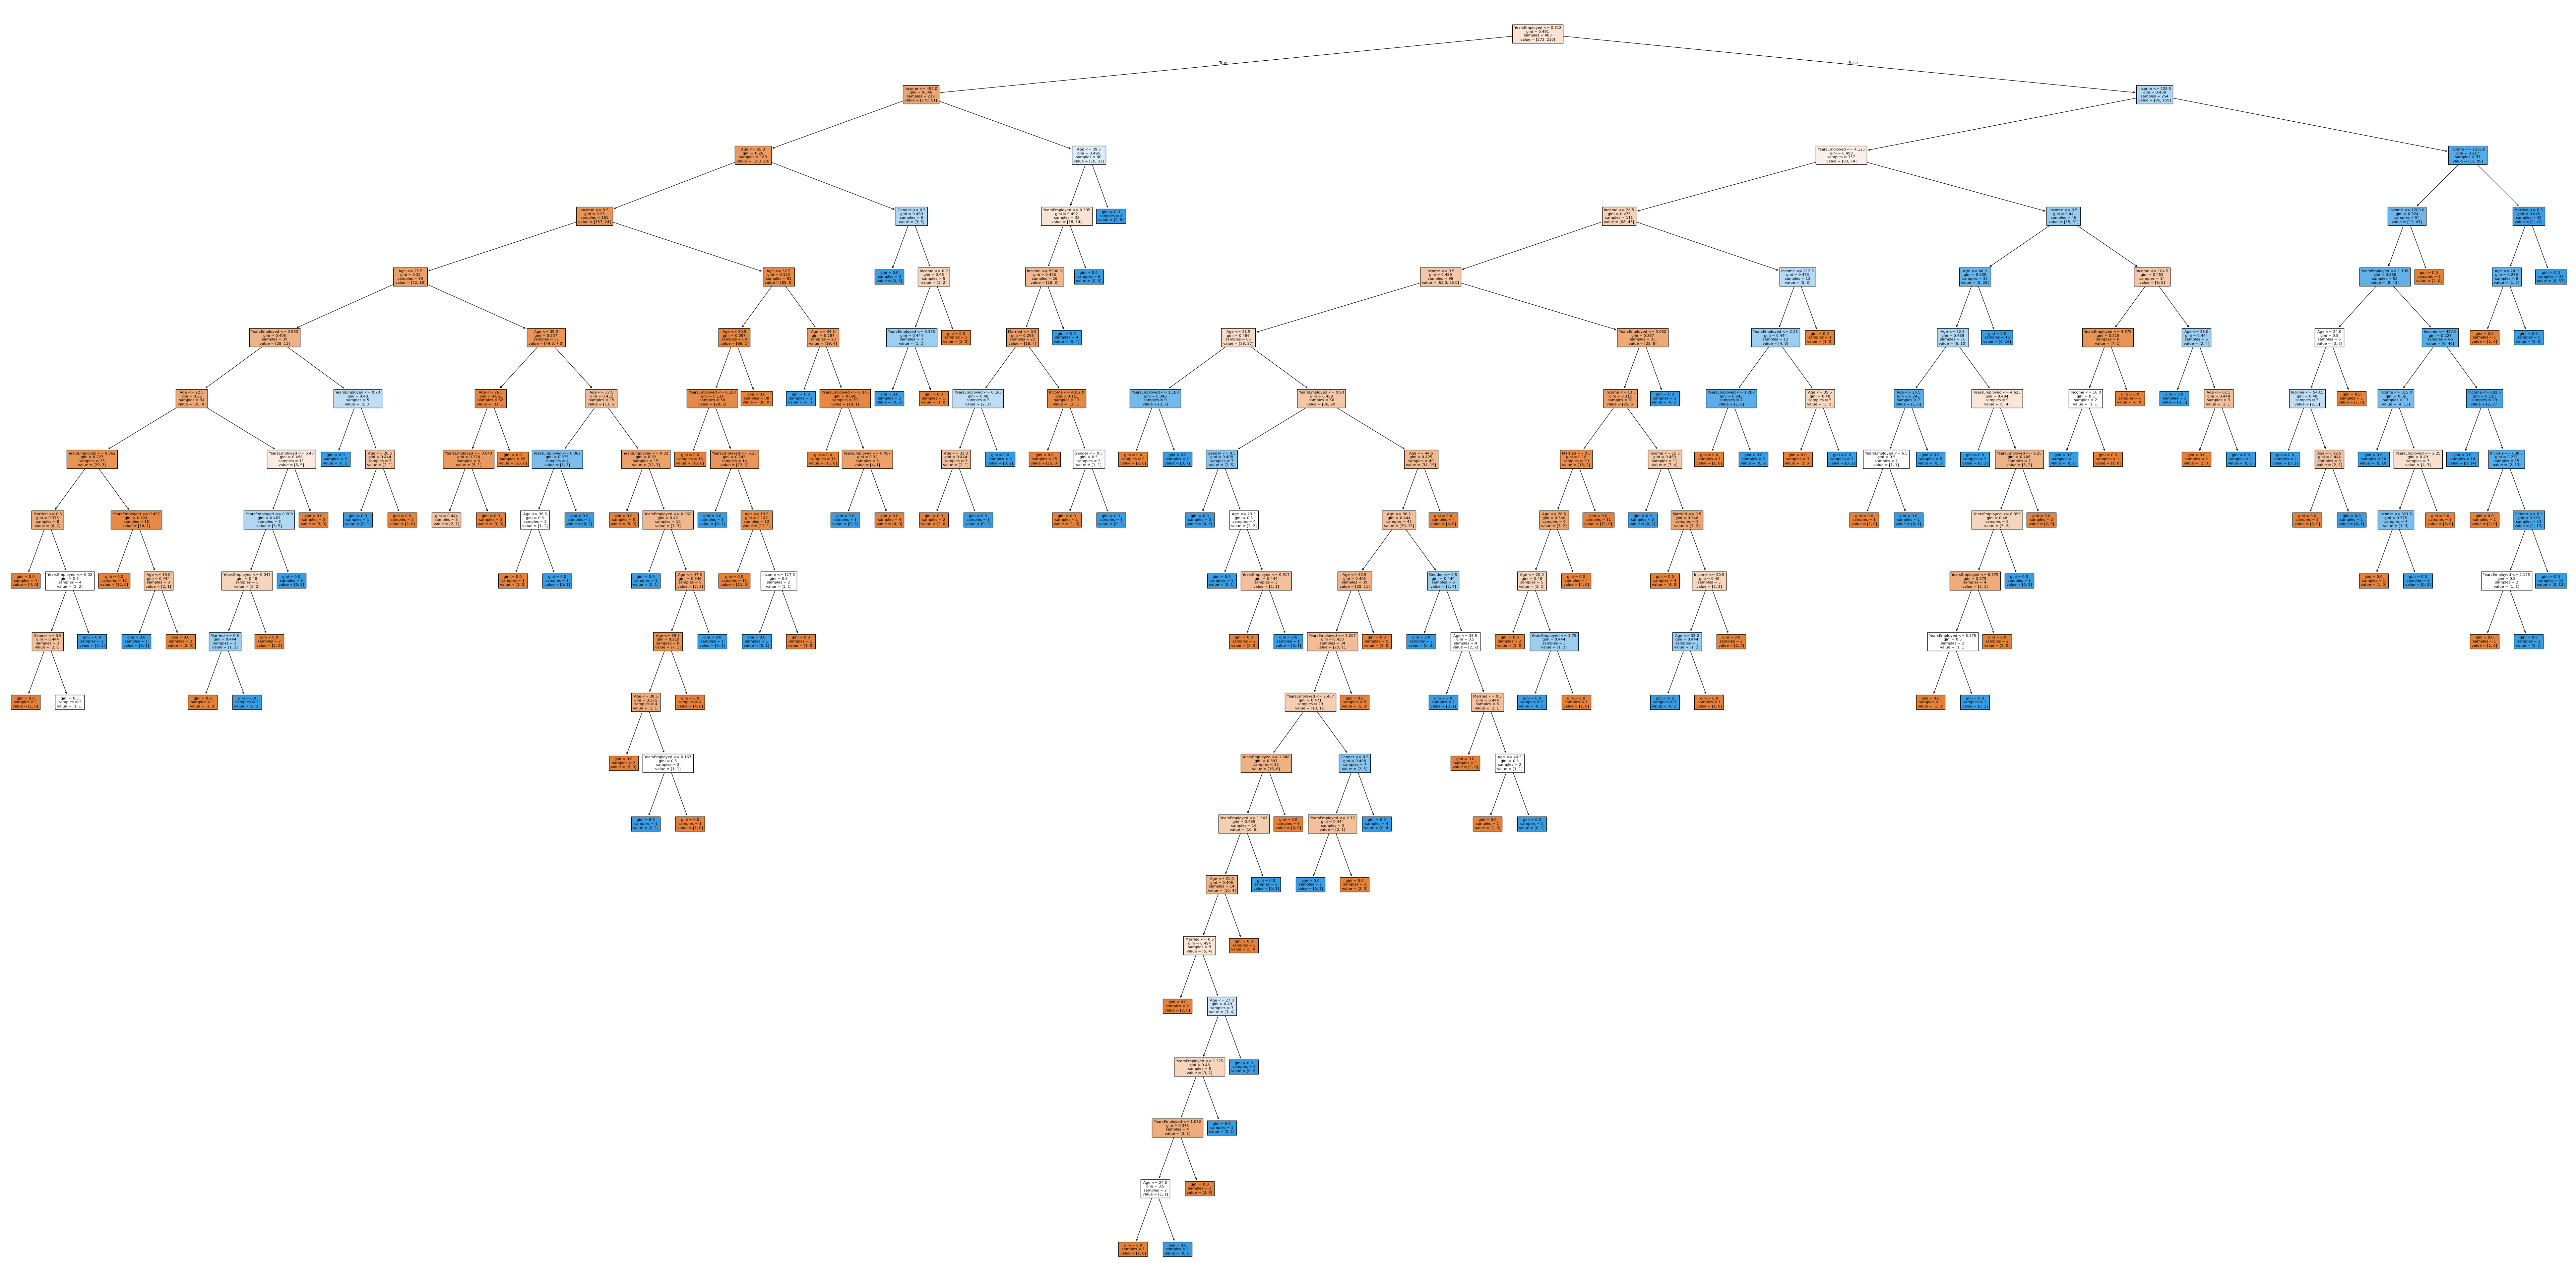

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

scale=5
plt.figure(figsize=(20*scale, 10*scale))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), fontsize=8)
plt.savefig('src/tree.png')
plt.show()